In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [2]:
links = pd.read_csv('../lecture-1/links.csv')
movies = pd.read_csv('../lecture-1/movies.csv')
ratings = pd.read_csv('../lecture-1/ratings.csv')
tags = pd.read_csv('../lecture-1/tags.csv')

In [3]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [4]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [5]:
movie_genres = [change_string(g) for g in movies.genres.values]

In [7]:
#movie_genres[:10]

In [8]:
#len(movie_genres)

In [6]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(movie_genres)

In [12]:
#print(X_train_counts)#[0:5][0:20]

In [7]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [8]:
neigh = NearestNeighbors(n_neighbors=7, n_jobs=-1, metric='euclidean') 
neigh.fit(X_train_tfidf)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=-1, n_neighbors=7, p=2, radius=1.0)

In [9]:
test = change_string("Adventure|Comedy|Fantasy|Crime")

predict = count_vect.transform([test])
X_tfidf2 = tfidf_transformer.transform(predict)

res = neigh.kneighbors(X_tfidf2, return_distance=True)

In [10]:
#test

In [11]:
#print(predict)

In [12]:
#res

In [13]:
#movies.iloc[res[1][0]]['movieId']

In [14]:
av_rat_movie=ratings.groupby(['movieId'])\
    [['rating']].agg(['mean', 'std'])\
    .reset_index(0)

av_rat_movie.rename(columns={'mean':'avg_mov', 'std':'std_mov'}, inplace=True)#.reset_index(0)
av_rat_movie.reset_index(0).head()

index movieId    rating          
                  avg_mov   std_mov
0     0       1  3.920930  0.834859
1     1       2  3.431818  0.881713
2     2       3  3.259615  1.054823
3     3       4  2.357143  0.852168
4     4       5  3.071429  0.907148

In [15]:
av_rat_movie.columns=[#'Index', 
    'movieId', 'avg_mov', 'std_mov']

In [16]:
#av_rat_movie.head()
av_rat_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 3 columns):
movieId    9724 non-null int64
avg_mov    9724 non-null float64
std_mov    6278 non-null float64
dtypes: float64(2), int64(1)
memory usage: 228.0 KB


In [17]:
def rat_from_neighbours_genr(movid):
    genr=movies[movies['movieId']==movid]['genres'].to_string(index=False)
    #movie_genres = [change_string(genr) for genr in movies.genres.values]
    #count_vect = CountVectorizer()
    #X_train_counts = count_vect.fit_transform(movie_genres)
    
    #tfidf_transformer = TfidfTransformer()
    #X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    
    #neigh = NearestNeighbors(n_neighbors=7, n_jobs=-1, metric='euclidean') 
    #neigh.fit(X_train_tfidf)
    
    test = change_string(genr)

    predict = count_vect.transform([test])
    X_tfidf2 = tfidf_transformer.transform(predict)

    res = neigh.kneighbors(X_tfidf2, return_distance=True)
    nmbs=movies.iloc[res[1][0]]['movieId'].values#(index=False)
    rati=av_rat_movie[av_rat_movie['movieId'].isin(nmbs)]['avg_mov'].values.mean()
    #rati=movies.loc[1, :]
    return rati# mbs#genr#

In [18]:
rat_from_neighbours_genr(2)

3.3742911965916558

In [19]:
#movies['movieId'].head(8).apply(lambda x: rat_from_neighbours_genr(x))
#
li=[]
for i in tqdm_notebook(movies['movieId']):
    #print(rat_from_neighbours_genr(i))
    li.append(rat_from_neighbours_genr(i))

A Jupyter Widget

KeyboardInterrupt: 

In [20]:
for i in tqdm_notebook(range(10**7)):
    pass

A Jupyter Widget

In [22]:
print(len(li), movies['movieId'].count())

44 9742


In [25]:
#av_rat_movie[[rat_from_neighbours(2)]]
#av_rat_movie.iloc(rat_from_neighbours(2)[:])

In [26]:
#av_rat_movie[av_rat_movie['movieId'].isin(rat_from_neighbours(2))]['avg_mov'].mean()
#av_rat_movie[av_rat_movie['movieId'].isin([60, 2162])]

In [ ]:
movieId	title
4963	Ocean's Eleven (2001)	
7361	Eternal Sunshine of the Spotless Mind (2004)
4993	Lord of the Rings: The Fellowship of the Ring, The (2001)
858	Godfather, The (1972)	
7153	Lord of the Rings: The Return of the King, The (2003)	57378
5952	Lord of the Rings: The Two Towers, The (2002)
4226	Memento (2000)
1193	One Flew Over the Cuckoo's Nest (1975)
541	Blade Runner (1982)
1221	Godfather: Part II, The (1974)	
2997	Being John Malkovich (1999)
778	Trainspotting (1996)
1923	There's Something About Mary (1998)
44191	V for Vendetta (2006)
109487	Interstellar (2014)

In [23]:
ratings_movies=movies.join(ratings.set_index('movieId'), on='movieId')

In [24]:
ratings_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [34]:
#users=list(set(ratings['userId']))

In [35]:
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(ratings.set_index('movieId'))

In [36]:
#neigh = NearestNeighbors(n_neighbors=7, n_jobs=-1, metric='euclidean') 
#neigh.fit(X_train_tfidf)

In [37]:
#test = change_string("Adventure|Comedy|Fantasy|Crime")
#test=[4963, 4993]
#predict = count_vect.transform([test])
#X_tfidf2 = tfidf_transformer.transform(predict)

#res = neigh.kneighbors(ratings_movies, return_distance=True)

In [39]:
#4963	Ocean's Eleven (2001)

In [38]:
#res

In [25]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [26]:
movies_with_tags = movies.join(tags.set_index('movieId'), on='movieId')

In [27]:
movies_with_tags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
1,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1.528844e+09
1,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1.528844e+09


In [28]:
movies_with_tags[movies_with_tags.title == 'Toy Story (1995)']

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09


In [30]:
movies_with_tags.tag.unique()

array(['pixar', 'fun', 'fantasy', ..., 'star wars', 'gintama', 'remaster'],
      dtype=object)

In [31]:
movies_with_tags.dropna(inplace=True)

In [32]:
movies_with_tags.title.unique().shape

(1572,)

In [33]:
mov_id=[]
tag_strings = []
movies_2 = []

for movie, group in tqdm_notebook(movies_with_tags.groupby(['movieId', 
        'title'])):
    tag_strings.append(' '.join([str(s).replace(' ', '').replace('-', '') for s in group.tag.values]))
    movies_2.append(movie)
    #mov_id.append(movid)

A Jupyter Widget

In [34]:
#movies_2[:5]
#movies_2[3][0]
for i, j in movies_2:
    print(i,j)

1 Toy Story (1995)
2 Jumanji (1995)
3 Grumpier Old Men (1995)
5 Father of the Bride Part II (1995)
7 Sabrina (1995)
11 American President, The (1995)
14 Nixon (1995)
16 Casino (1995)
17 Sense and Sensibility (1995)
21 Get Shorty (1995)
22 Copycat (1995)
25 Leaving Las Vegas (1995)
26 Othello (1995)
28 Persuasion (1995)
29 City of Lost Children, The (Cité des enfants perdus, La) (1995)
31 Dangerous Minds (1995)
32 Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
34 Babe (1995)
36 Dead Man Walking (1995)
38 It Takes Two (1995)
39 Clueless (1995)
40 Cry, the Beloved Country (1995)
41 Richard III (1995)
43 Restoration (1995)
45 To Die For (1995)
46 How to Make an American Quilt (1995)
47 Seven (a.k.a. Se7en) (1995)
50 Usual Suspects, The (1995)
52 Mighty Aphrodite (1995)
58 Postman, The (Postino, Il) (1994)
62 Mr. Holland's Opus (1995)
92 Mary Reilly (1996)
96 In the Bleak Midwinter (1995)
101 Bottle Rocket (1996)
104 Happy Gilmore (1996)
107 Muppet Treasure Island (1996)
110 Braveheart (1995)
11

In [35]:
tag_strings[:5]

['pixar pixar fun',
 'fantasy magicboardgame RobinWilliams game',
 'moldy old',
 'pregnancy remake',
 'remake']

In [36]:
count_vect_tag = CountVectorizer()
X_train_counts_tag = count_vect_tag.fit_transform(tag_strings)

In [37]:
tfidf_transformer_tag = TfidfTransformer()
X_train_tfidf_tag = tfidf_transformer_tag.fit_transform(X_train_counts_tag)

In [38]:
neigh_tag = NearestNeighbors(n_neighbors=7, n_jobs=-1, metric='manhattan') 
neigh_tag.fit(X_train_tfidf_tag)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
         metric_params=None, n_jobs=-1, n_neighbors=7, p=2, radius=1.0)

In [39]:
for i, j in movies_2:
    if "Eternal Sunshine of the Spotless Mind (2004)" == j:
        print(j, i)
#Jumanji (1995)
#Eternal Sunshine of the Spotless Mind (2004)

Eternal Sunshine of the Spotless Mind (2004) 7361


In [40]:
len(tag_strings)

1572

In [41]:
#test = change_string('fantasy highfantasy Magic mythology tolkien wizards Tolkein')
#test = 'fantasy highfantasy Magic mythology tolkien wizards Tolkein'.split(' ')
test = 'alternatereality memory thoughtprovoking jimcarrey memory cultfilm imagination JimCarrey love surreal arthouse artistic atmospheric beautiful bittersweet colourful comedy dreamlike emotional feelgood happpiness humane insightful intelligent lovely melancholy mindbending philosophy quirky quirkyromantic romantic surreal surrealism thoughtprovoking'

predict = count_vect_tag.transform([test])
X_tfidf2 = tfidf_transformer_tag.transform(predict)

res = neigh_tag.kneighbors(X_tfidf2, return_distance=True)

In [42]:
test

'alternatereality memory thoughtprovoking jimcarrey memory cultfilm imagination JimCarrey love surreal arthouse artistic atmospheric beautiful bittersweet colourful comedy dreamlike emotional feelgood happpiness humane insightful intelligent lovely melancholy mindbending philosophy quirky quirkyromantic romantic surreal surrealism thoughtprovoking'

In [43]:
res

(array([[0.        , 5.26680772, 5.26680772, 5.63399515, 5.9264611 ,
         5.99143112, 5.99143112]]),
 array([[1149,  673,  990,  494, 1356, 1380, 1506]]))

In [44]:
movies[movies.title=='Eternal Sunshine of the Spotless Mind (2004)']

,movieId,title,genres
4909,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi


In [45]:
movies[movies.movieId.isin([1149,  673,  990,  494, 1356, 1380, 1506])]
#tags[tags.movieId.isin([ 1149,  673,  990,  494, 1356, 1380, 1506])]

,movieId,title,genres
431,494,Executive Decision (1996),Action|Adventure|Thriller
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...
754,990,Maximum Risk (1996),Action|Adventure|Thriller
1044,1356,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller
1063,1380,Grease (1978),Comedy|Musical|Romance


In [46]:
tags[tags.movieId==7361].head()

,userId,movieId,tag,timestamp
545,193,7361,alternate reality,1435857168
546,193,7361,memory,1435857171
547,193,7361,thought-provoking,1435857163
882,424,7361,jim carrey,1457901740
2274,474,7361,memory,1137205808


In [47]:
#for i in res[1][0]:
#    print(movies[i])

print(' '.join(tags[tags.movieId==7361].tag.values))#.head()
#print(tags[tags.movieId==7361].tag.apply(lambda x: ' '.join([str(s).replace(' ', '').replace('-', '') for s in x])))#.head()
print(tags[tags.movieId==7361].tag.values)

#''.join(list1)
#' '.join([str(s).replace(' ', '').replace('-', '') for s in group.tag.values])

alternate reality memory thought-provoking jim carrey memory cult film imagination Jim Carrey love surreal arthouse artistic atmospheric beautiful bittersweet colourful comedy dreamlike emotional feel-good happpiness humane insightful intelligent lovely melancholy mind-bending philosophy quirky quirky romantic romantic surreal surrealism thought-provoking
['alternate reality' 'memory' 'thought-provoking' 'jim carrey' 'memory'
 'cult film' 'imagination' 'Jim Carrey' 'love' 'surreal' 'arthouse'
 'artistic' 'atmospheric' 'beautiful' 'bittersweet' 'colourful' 'comedy'
 'dreamlike' 'emotional' 'feel-good' 'happpiness' 'humane' 'insightful'
 'intelligent' 'lovely' 'melancholy' 'mind-bending' 'philosophy' 'quirky'
 'quirky romantic' 'romantic' 'surreal' 'surrealism' 'thought-provoking']


In [48]:
def change_tags_to_string(s):
    #return ' '.join(s.replace(' ', '').replace('-', '')\
                        #.split('|')\
    #                   )
    wo_sp=s.apply(lambda x: x.replace(' ', '').replace('-', ''))
    conc=' '.join(wo_sp)
    return conc

In [49]:
change_tags_to_string(tags[tags.movieId==7361].tag)
#change_tags_to_string(tags[tags.movieId==7361].tag.values)
#tags[tags.movieId==7361].tag.apply(lambda x: x.replace(' ', '').replace('-', ''))

'alternatereality memory thoughtprovoking jimcarrey memory cultfilm imagination JimCarrey love surreal arthouse artistic atmospheric beautiful bittersweet colourful comedy dreamlike emotional feelgood happpiness humane insightful intelligent lovely melancholy mindbending philosophy quirky quirkyromantic romantic surreal surrealism thoughtprovoking'

In [50]:
def rat_from_neighbours_tag(movid):
    test=change_tags_to_string(tags[tags.movieId==movid].tag)
    
    #test = change_string(ta)

    predict = count_vect_tag.transform([test])
    X_tfidf2_tag = tfidf_transformer_tag.transform(predict)

    res = neigh_tag.kneighbors(X_tfidf2_tag, return_distance=True)
    nmbs=movies.iloc[res[1][0]]['movieId'].values#(index=False)
    rati=av_rat_movie[av_rat_movie['movieId'].isin(nmbs)]['avg_mov'].values.mean()
    #rati=movies.loc[1, :]
    return rati#test, predict, res,  mbs#genr#

In [51]:
rat_from_neighbours_tag(2)

3.2707019171304883

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
av_rat_user=ratings.groupby(['userId'])\
    [['rating']].agg(['mean', 'std'])\
    .reset_index(0)
av_rat_user.rename(columns={'mean':'avg_usr', 'std':'std_usr'}, inplace=True)
av_rat_user.head()

userId    rating          
           avg_usr   std_usr
0      1  4.366379  0.800048
1      2  3.948276  0.805615
2      3  2.435897  2.090642
3      4  3.555556  1.314204
4      5  3.636364  0.990441

In [66]:
len(av_rat_movie)

9724

In [67]:
av_rat_movie['av_rat_from_neigh_genr']=av_rat_movie.movieId.apply(lambda x: rat_from_neighbours_genr(x))

In [68]:
av_rat_movie['av_rat_from_neigh_tag']=av_rat_movie.movieId.apply(lambda x: rat_from_neighbours_tag(x))

In [71]:
av_rat_movie.head()

,movieId,avg_mov,std_mov,av_rat_from_neigh_genr,av_rat_from_neigh_tag
0,1,3.920930,0.834859,3.295321,3.662004
1,2,3.431818,0.881713,3.374291,3.270702
2,3,3.259615,1.054823,2.861310,3.551075
3,4,2.357143,0.852168,3.458118,3.443209
4,5,3.071429,0.907148,3.086538,2.883180


In [69]:
joined_with_av_rat_movie=ratings.join(av_rat_movie.set_index('movieId'), on='movieId')

In [72]:
joined_with_av_rat=joined_with_av_rat_movie.join(av_rat_user.set_index('userId'), on='userId')

/home/zamarseny/anaconda3/envs/recsys/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [93]:
#joined_with_av_rat.drop(joined_with_av_rat.columns[[4,7]], axis=1, inplace=True)


In [73]:
#joined_with_av_rat.columns[[4,7]]
joined_with_av_rat.head()

,userId,movieId,rating,timestamp,avg_mov,std_mov,av_rat_from_neigh_genr,av_rat_from_neigh_tag,"(rating, avg_usr)","(rating, std_usr)"
0,1,1,4.0,964982703,3.920930,0.834859,3.295321,3.662004,4.366379,0.800048
1,1,3,4.0,964981247,3.259615,1.054823,2.861310,3.551075,4.366379,0.800048
2,1,6,4.0,964982224,3.946078,0.817224,3.251014,3.443209,4.366379,0.800048
3,1,47,5.0,964983815,3.975369,0.922429,3.111722,3.648364,4.366379,0.800048
4,1,50,5.0,964982931,4.237745,0.800921,3.518789,2.789100,4.366379,0.800048


In [74]:
joined_with_av_rat.columns=['userId', 'movieId', 'rating', 'timestamp', 'avg_mov', 'std_mov', \
                                'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag', \
                                'avg_usr', 'std_usr']

In [75]:
joined_with_av_rat.head()

,userId,movieId,rating,timestamp,avg_mov,std_mov,av_rat_from_neigh_genr,av_rat_from_neigh_tag,avg_usr,std_usr
0,1,1,4.0,964982703,3.920930,0.834859,3.295321,3.662004,4.366379,0.800048
1,1,3,4.0,964981247,3.259615,1.054823,2.861310,3.551075,4.366379,0.800048
2,1,6,4.0,964982224,3.946078,0.817224,3.251014,3.443209,4.366379,0.800048
3,1,47,5.0,964983815,3.975369,0.922429,3.111722,3.648364,4.366379,0.800048
4,1,50,5.0,964982931,4.237745,0.800921,3.518789,2.789100,4.366379,0.800048


In [76]:
joined_with_av_rat.count()

userId                    100836
movieId                   100836
rating                    100836
timestamp                 100836
avg_mov                   100836
std_mov                    97390
av_rat_from_neigh_genr    100836
av_rat_from_neigh_tag     100836
avg_usr                   100836
std_usr                   100836
dtype: int64

In [77]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [78]:
joined_with_av_rat.dropna(inplace=True)

In [80]:
#joined_with_av_rat['movieId'].head(20).apply(lambda x: rat_from_neighbours_genr(x))

In [81]:
X=joined_with_av_rat[['movieId', 'userId', 'avg_mov', 'std_mov', \
                          'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag', 'avg_usr', 'std_usr']]
y=joined_with_av_rat['rating']

In [82]:
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
MinMaxScaler(copy=True, feature_range=(0, 1))

data_train_sc=pd.DataFrame(scaler.transform(data_train) \
                           ,columns=data_train.columns \
                          )
data_test_sc=pd.DataFrame(scaler.transform(data_test),columns=data_test.columns)

In [84]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(data_train_sc[['avg_mov', \
                                                              'std_mov', \
                                                              'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag',\
                                                              'avg_usr'\
                                                              , 'std_usr'\
                                                             ]], y_train)
print(reg.intercept_ )

-0.731122342534233


In [86]:
print(reg.score(data_train_sc[['avg_mov', \
                               'std_mov', \
                               'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag',\
                               'avg_usr'\
                               , 'std_usr'\
                              ]], y_train)\
      ,reg.score(data_test_sc[['avg_mov', \
                               'std_mov', \
                               'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag',\
                               'avg_usr'\
                               , 'std_usr'\
                              ]], y_test) )

0.3764899889307187 0.3785921923426132


In [103]:
pred=reg.predict(data_test_sc[['avg_mov',\
                                'std_mov', \
                               'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag',\
                               'avg_usr'\
                               , 'std_usr'\
                              ]])
pred_tr=reg.predict(data_train_sc[['avg_mov',\
                                'std_mov', \
                               'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag',\
                               'avg_usr'\
                               , 'std_usr'\
                              ]])

In [88]:
for i in zip(pred, y_test):
    print(i)

(4.278212464623483, 4.0)
(3.8830580906518586, 4.5)
(3.1059772850609253, 3.0)
(3.2355529751747634, 3.0)
(1.8803029491510883, 2.0)
(3.657461826326019, 4.0)
(3.1593971635948184, 4.0)
(4.028253009693692, 4.5)
(3.0875009015017802, 4.0)
(4.13008427223078, 4.0)
(4.284724665247849, 3.0)
(3.191739938549545, 3.5)
(3.8872118901471246, 4.0)
(3.1641509740000338, 4.0)
(4.682609610830688, 5.0)
(3.700148245941209, 4.5)
(3.747911434996987, 1.0)
(4.11871415130297, 4.0)
(4.319862843621447, 5.0)
(3.295220654329527, 3.5)
(3.6271011659716432, 3.0)
(2.850099451980845, 4.0)
(3.8928019257828748, 4.5)
(3.9292743805612202, 4.0)
(3.774371994948657, 2.0)
(3.3622831772789974, 4.0)
(3.116296789365311, 3.0)
(3.8948655122832765, 5.0)
(2.7743563120980395, 1.0)
(1.937409922718266, 3.0)
(3.352546882235452, 4.0)
(3.6112641971693673, 4.5)
(3.8088395646140736, 2.5)
(3.729852736539037, 3.0)
(4.669098016173374, 5.0)
(3.7449675539751475, 3.5)
(3.7763488912633623, 2.5)
(4.351537051084004, 4.0)
(3.495840362432144, 3.5)
(3.387676

(3.260871696003898, 3.5)
(3.329432343866424, 3.0)
(3.189632075717914, 4.5)
(3.9892494256628233, 4.0)
(2.3631538616784593, 2.0)
(3.8557009244434184, 3.5)
(2.011182544850088, 2.0)
(4.0873692152077075, 5.0)
(3.7362179695146525, 4.5)
(3.3716193185895875, 4.0)
(3.6155911220539743, 4.0)
(3.122863546390067, 2.5)
(3.789064811774124, 4.0)
(4.155980870858162, 4.5)
(2.805249826998856, 2.5)
(3.6612887810122725, 5.0)
(3.2701349256965937, 3.0)
(3.2561183553049746, 3.0)
(2.0816861341920476, 3.0)
(3.8717525484885087, 4.0)
(3.3860606099664246, 2.0)
(3.3537924005562836, 5.0)
(4.101637577160501, 5.0)
(4.571873257290053, 5.0)
(4.179713312117748, 4.0)
(3.477205132125931, 4.0)
(2.9918820576234566, 3.0)
(3.1970985646196546, 3.0)
(3.7671270625482585, 2.0)
(3.9142912062711783, 4.0)
(2.9649221231809353, 3.5)
(3.4518435467105792, 4.5)
(3.617152405724239, 2.5)
(3.783789040068191, 4.0)
(2.7560474593013717, 3.0)
(4.032786402129147, 5.0)
(3.299831470355561, 3.0)
(4.103580944511332, 4.0)
(3.520866811021671, 1.5)
(3.0

(2.8271921636886215, 2.0)
(3.464295392714514, 3.5)
(4.059524803177265, 4.0)
(3.5990306585891814, 3.0)
(4.207859714598662, 3.0)
(3.9141887020376167, 3.5)
(3.9338243497250787, 3.0)
(2.012878383337183, 1.0)
(4.548014489692593, 5.0)
(2.9514297779075283, 3.0)
(3.421540909231428, 4.5)
(3.0932647456954006, 2.5)
(3.4522957395037785, 4.0)
(2.8289429823464234, 3.5)
(3.1248392199340103, 2.0)
(2.3659793037997554, 2.0)
(3.359384378693705, 3.5)
(3.2726170511441275, 3.0)
(3.6932448539247247, 4.0)
(4.050324662233278, 5.0)
(3.6226694191093634, 3.0)
(4.5044959054506215, 4.0)
(3.362798218209994, 5.0)
(3.1293928667380975, 4.5)
(3.3750613418541286, 5.0)
(4.368892070267374, 3.5)
(3.464514901627296, 3.5)
(3.3398811517445317, 3.0)
(2.5819459737752757, 3.5)
(3.8734220262059305, 3.5)
(3.66221778030307, 3.0)
(3.450042034587252, 2.5)
(2.911572594052587, 0.5)
(4.572340616719137, 5.0)
(3.7086735184811577, 2.5)
(3.449367393313951, 2.5)
(3.3274851496484175, 3.0)
(3.1660095164843467, 4.0)
(3.358993467188162, 3.5)
(2.7

(3.541833007215369, 4.0)
(4.129221687316518, 5.0)
(3.7214139462666624, 4.0)
(4.800211867943308, 5.0)
(3.424269622091689, 4.0)
(4.315585543138697, 4.0)
(4.683283632195178, 5.0)
(4.13109269999876, 5.0)
(2.862110279501569, 2.0)
(2.6498432634391103, 0.5)
(3.9254841004268703, 5.0)
(3.892965193733242, 4.5)
(3.789625073904012, 3.0)
(3.8581192054165987, 4.5)
(3.6647448925936343, 2.0)
(1.2132237496580134, 1.0)
(4.409375734690774, 3.0)
(3.030309203742536, 3.0)
(3.0902793222291915, 2.5)
(3.839300218643685, 4.5)
(4.1517734212341875, 4.0)
(2.805709992594969, 1.0)
(3.5219156518141688, 4.0)
(3.6592431586021563, 4.0)
(2.7400802485037183, 4.0)
(4.2833021507558176, 5.0)
(2.977511974850065, 3.0)
(3.568850725847473, 4.0)
(3.907362968144806, 4.0)
(4.696147954343926, 4.0)
(3.2750443092883748, 4.0)
(3.9014884916562576, 5.0)
(3.994032067149025, 5.0)
(3.158015350605986, 2.5)
(2.996498891645242, 2.5)
(3.6366643189640486, 3.0)
(2.8498933033425833, 2.0)
(4.030700120858704, 3.5)
(3.4600696962930986, 3.0)
(4.484156

(3.4945831958571674, 5.0)
(2.965819156930735, 4.0)
(4.348225778508862, 4.5)
(4.121085943523401, 5.0)
(3.0554369915894943, 3.0)
(4.470777669287252, 3.5)
(3.4726087049472376, 4.0)
(3.725059834199974, 4.0)
(4.873670791395061, 3.5)
(3.337968361579259, 4.0)
(3.978248684015611, 5.0)
(3.004801073853486, 2.5)
(3.4539546136864088, 4.0)
(3.2969247734504794, 3.0)
(3.8045906825397804, 5.0)
(4.323558350794336, 5.0)
(2.357654751649056, 2.0)
(3.1573937542023742, 2.5)
(3.285508047674419, 3.0)
(3.051128176710676, 3.5)
(2.3212758575143253, 0.5)
(3.869501534588214, 4.0)
(2.550548658320286, 1.0)
(3.048473038098097, 3.0)
(3.225014715216565, 2.0)
(4.284271997958188, 5.0)
(3.6913892075777195, 4.5)
(1.9869001654047596, 1.5)
(2.5798134901977674, 4.0)
(3.653875679337231, 4.5)
(1.9978426023241322, 3.0)
(3.3851927006934908, 3.5)
(2.046980426683028, 0.5)
(3.9007329235622112, 3.0)
(2.9044872449625796, 0.5)
(3.2989420109798413, 3.0)
(4.26935112493787, 4.5)
(3.0141034941453846, 1.0)
(3.935826512689694, 4.0)
(2.395250

(2.28898659629467, 1.0)
(3.5013508434475336, 3.0)
(3.4342245470343276, 3.0)
(2.6586530457262656, 2.5)
(3.7590222385309344, 4.0)
(4.4218968401134875, 4.5)
(3.1976481900652383, 3.0)
(4.650751458904924, 5.0)
(2.437960643335777, 3.0)
(3.8737614484231493, 4.0)
(3.8044943975317507, 4.0)
(3.980221633744481, 4.0)
(4.1407570110301055, 4.5)
(3.2637931767871993, 3.0)
(2.437255094796112, 2.0)
(3.8542076012848376, 3.0)
(3.011255335157817, 3.0)
(3.946176835022804, 4.0)
(4.572569242343889, 4.5)
(4.122712856991785, 4.0)
(3.3281037473096458, 4.0)
(4.122860137182652, 5.0)
(3.237541635564342, 2.5)
(3.598068214336058, 4.0)
(3.3772140984538686, 2.0)
(3.430227419879662, 4.0)
(3.937523665552016, 3.0)
(2.0582395497137997, 2.5)
(3.1158504070808246, 2.5)
(3.696814179148948, 5.0)
(3.706227042058557, 4.5)
(3.941241822143013, 5.0)
(4.099881675093162, 5.0)
(2.4755843354958627, 2.5)
(3.460711312293263, 2.5)
(3.9686759057908256, 3.5)
(3.5301424990543264, 4.0)
(3.591161594280967, 4.0)
(3.7693645457609506, 3.5)
(4.0906

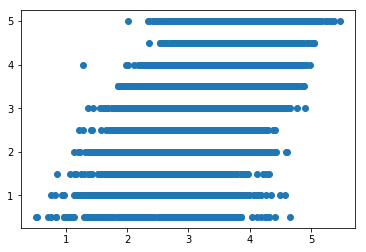

In [89]:
import matplotlib.pyplot as plt
plt.scatter(pred, y_test)

In [104]:
from sklearn.metrics import mean_squared_error
#from math import sqrt

print(np.sqrt(mean_squared_error(y_test, pred)), np.sqrt(mean_squared_error(y_train, pred_tr)))

0.8199233286422053 0.819417257320983


In [94]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)

rfr.fit(data_train_sc[['avg_mov', \
                      'std_mov', \
                      'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag',\
                      'avg_usr', \
                      'std_usr']], y_train)
print(rfr.feature_importances_)

[0.37241428 0.12229073 0.08560292 0.05167954 0.25238242 0.11563011]


In [97]:
y_pred_tr=rfr.predict(data_train_sc[['avg_mov', 'std_mov', \
                          'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag', 'avg_usr', 'std_usr']])
y_pred_te=rfr.predict(data_test_sc[['avg_mov', 'std_mov', \
                          'av_rat_from_neigh_genr', 'av_rat_from_neigh_tag', 'avg_usr', 'std_usr']])

In [102]:
print(np.sqrt(mean_squared_error(y_test, y_pred_te)), np.sqrt(mean_squared_error(y_train, y_pred_tr)))

0.8203594790259551 0.45127996444490803


In [ ]:
#Рандом форест чуть получше. Конец решения